# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)

## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((3,3))
b = np.random.sample((3,3))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print(a.ndim)
print(b.ndim)
print(a.shape)
print(b.shape)
# ========
print(a)
print(b)

2
2
(3, 3)
(3, 3)
[[ 0.43049464  0.15119892  0.64007488]
 [ 0.70467013  0.5878185   0.92831958]
 [ 0.06001992  0.19379207  0.04231648]]
[[ 0.75096695  0.56266882  0.16145079]
 [ 0.17877733  0.2911054   0.04864697]
 [ 0.07864908  0.8875075   0.36369074]]


In [41]:
def mult(a, b):
    rang = a.shape[0]
    array = [[0 for y in range(rang)] for x in range(rang)]
    for i in range(rang):
        for j in range(rang):
            for n in range(rang):
                array[i][j] += a[i,n]*b[n,j]
    for i in array:
        print(i)
    pass

In [42]:
def np_mult(a, b):
    print(a @ b)
    pass

In [59]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

[0.40065948167904203, 0.85431198840641787, 0.30964836965024573]
[0.70728407899132395, 1.3915036467510309, 0.4799863664233619]
[0.08304675805845288, 0.12774144999001247, 0.034507771920167671]
Wall time: 511 µs


In [60]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

[[ 0.40065948  0.85431199  0.30964837]
 [ 0.70728408  1.39150365  0.47998637]
 [ 0.08304676  0.12774145  0.03450777]]
Wall time: 1.5 ms


### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [32]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    return A.cumsum() / np.arange(1, len(A)+1)
    pass

In [35]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(len(A)):
        if i == 0:
            S[i] = A[i]
        else:
            S[i] = S[i-1]+A[i]
    for i in range(len(A)):
        S[i] /= i+1
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 126 ms
Wall time: 7.32 s


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [90]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = X.copy()
    Y[1::2] = a
    Y[0::2] = X[len(X):0:-2]**2
    Y = np.vstack((Y[::-1],X[::-1]))
    return Y

In [91]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    Y = X.copy()
    for i in range(len(Y)):
        if i % 2:
            Y[i] = a
        else:
            Y[i] = X[-i-1]**2
    Y = [Y[::-1], X[::-1]]
    return Y

In [108]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
print(np.abs(S1 - S2).sum())

Wall time: 203 ms
Wall time: 2.98 s
4.85120236518e-13


Почему методы ***numpy*** оказываются эффективнее?

In [109]:
# Потому что они не stupid, используют язык C, а массивы numpy гораздо компактнее чем списки в питоне

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [72]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

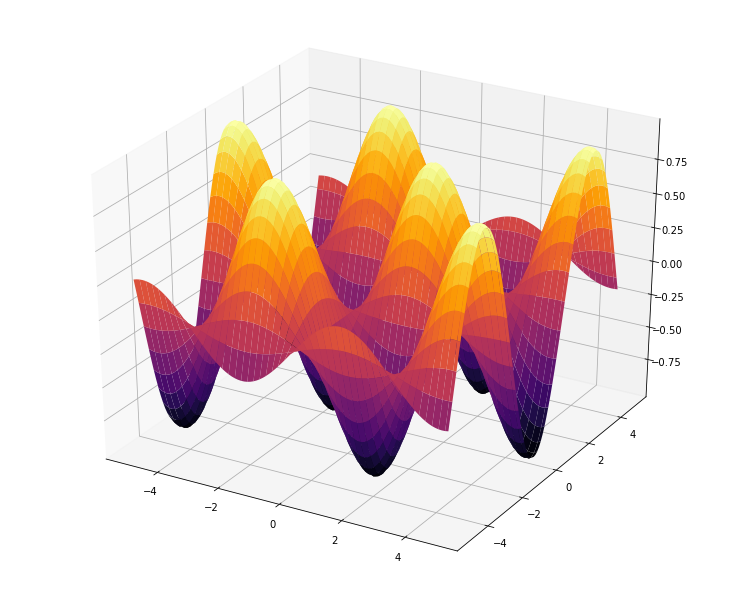

In [75]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

grid_x, grid_y = np.meshgrid(x, y, sparse = True)

draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [93]:
from matplotlib import pyplot as plt
%matplotlib inline

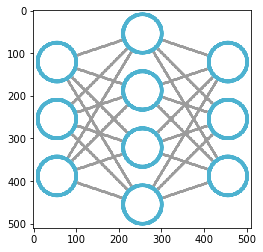

In [94]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [104]:
flat_image_array = image_array.reshape(image_array.size)

In [107]:
# здесь выведите размер нового массива
flat_image_array.shape

(1040400,)